In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder #LabelEncoder 
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv(r'C:\Users\Fareda\Downloads\Machine learning workshop\Vehicles0515.csv', on_bad_lines = 'skip')
data2 = pd.read_csv(r'C:\Users\Fareda\Downloads\Machine learning workshop\Accidents0515.csv', on_bad_lines = 'skip')
data3= pd.read_csv(r'C:\Users\Fareda\Downloads\Machine learning workshop\Casualties0515.csv', on_bad_lines = 'skip')


In [3]:
data

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004420,2014984138414,1,9,0,5,0,6,0,0,0,...,1,2,1,27,6,1781,1,12,6,1
3004421,2014984138414,2,19,0,18,0,1,1,4,7,...,1,2,1,44,7,1686,2,4,1,1
3004422,2014984138414,3,9,0,18,0,2,1,4,1,...,1,6,1,73,10,2143,2,-1,8,3
3004423,2014984139614,1,11,0,9,0,8,0,0,0,...,1,1,1,40,7,4500,2,4,-1,3


In [4]:
data2

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780648,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,11/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
1780649,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,02/12/2015,...,0,0,1,1,2,0,0,2,1,NaN
1780650,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,23/12/2015,...,0,0,6,4,2,0,0,2,1,NaN
1780651,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,26/12/2015,...,0,0,1,2,2,0,0,2,1,NaN


In [5]:
data3

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216715,2014984137714,1,1,2,2,16,4,3,0,0,2,0,0,9,1
2216716,2014984138414,1,1,1,1,27,6,3,0,0,0,0,0,9,1
2216717,2014984138414,2,2,1,1,44,7,2,0,0,0,0,0,19,1
2216718,2014984139614,1,2,2,1,61,9,3,0,0,0,4,0,11,2


Merging columns from another dataset

In [4]:
s = data3['Casualty_Severity']
data['Casualty_Severity'] = s

d = data2['Accident_Severity']
data['Accident_Severity'] = d

b = data2['Road_Type']
data['Road_Type'] = b

a = data2['Did_Police_Officer_Attend_Scene_of_Accident']
data['Did_Police_Officer_Attend_Scene_of_Accident'] = a


checking if there's any missing values


In [7]:
missing_values = data.isna().sum() ,      
missing_values


(Accident_Index                                       0
 Vehicle_Reference                                    0
 Vehicle_Type                                         0
 Towing_and_Articulation                              0
 Vehicle_Manoeuvre                                    0
 Vehicle_Location-Restricted_Lane                     0
 Junction_Location                                    0
 Skidding_and_Overturning                             0
 Hit_Object_in_Carriageway                            0
 Vehicle_Leaving_Carriageway                          0
 Hit_Object_off_Carriageway                           0
 1st_Point_of_Impact                                  0
 Was_Vehicle_Left_Hand_Drive?                         0
 Journey_Purpose_of_Driver                            0
 Sex_of_Driver                                        0
 Age_of_Driver                                        0
 Age_Band_of_Driver                                   0
 Engine_Capacity_(CC)                           

In [8]:
missing_values = data2.isna().sum() ,      
missing_values

(Accident_Index                                      0
 Location_Easting_OSGR                             138
 Location_Northing_OSGR                            138
 Longitude                                         138
 Latitude                                          138
 Police_Force                                        0
 Accident_Severity                                   0
 Number_of_Vehicles                                  0
 Number_of_Casualties                                0
 Date                                                0
 Day_of_Week                                         0
 Time                                              151
 Local_Authority_(District)                          0
 Local_Authority_(Highway)                           0
 1st_Road_Class                                      0
 1st_Road_Number                                     0
 Road_Type                                           0
 Speed_limit                                         0
 Junction_

Checking before cleaning

<AxesSubplot:>

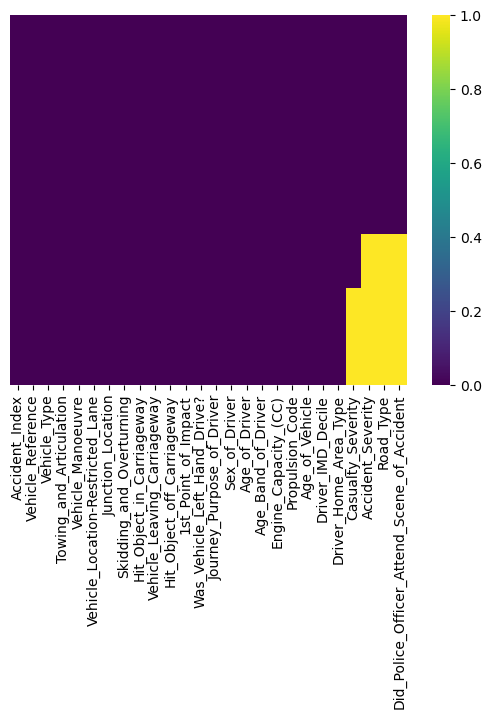

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cmap = "viridis")


<AxesSubplot:>

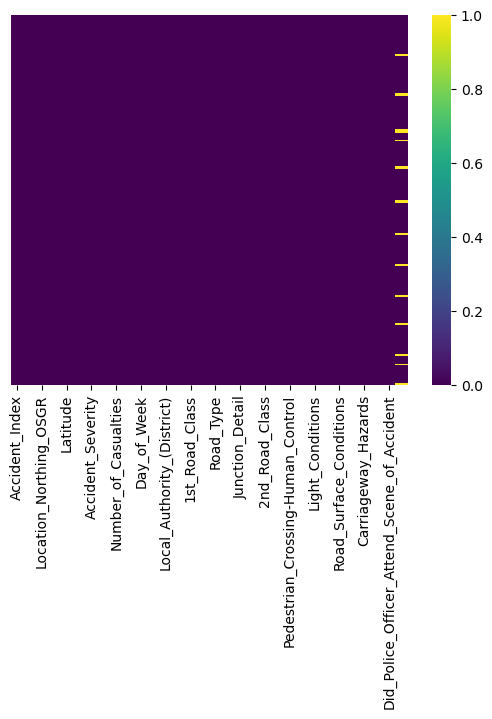

In [9]:
sns.heatmap(data2.isnull(), yticklabels = False, cmap = "viridis")

Remove duplicate rows

In [5]:
duplicate_rows = data[data.duplicated()]
print('number of duplicated rows :' , duplicate_rows.shape[0]) 

duplicate_rows = data2[data2.duplicated()]
print('number of duplicated rows :' , duplicate_rows.shape[0]) 

number of duplicated rows : 0
number of duplicated rows : 0


In [5]:
data.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,10,-1,-1,-1,7,1,2.0,2.0,6.0,1.0
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,7,8268,2,3,-1,-1,3.0,3.0,3.0,1.0
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,6,8300,2,5,2,1,3.0,3.0,6.0,1.0
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,9,1762,1,6,1,1,3.0,3.0,6.0,1.0
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,8,1769,1,4,2,1,3.0,3.0,6.0,1.0
5,200501BS00005,1,3,0,18,0,0,1,10,0,...,8,85,1,10,-1,-1,3.0,3.0,6.0,1.0
6,200501BS00006,1,9,0,5,0,0,0,0,0,...,8,2976,1,1,4,1,3.0,3.0,6.0,1.0
7,200501BS00006,2,3,0,18,0,0,0,0,0,...,6,124,1,2,1,1,3.0,3.0,3.0,1.0
8,200501BS00007,1,3,0,18,0,1,0,4,0,...,6,-1,-1,-1,-1,-1,3.0,3.0,6.0,1.0
9,200501BS00007,2,9,0,2,0,1,0,0,0,...,7,4266,1,4,6,1,3.0,3.0,6.0,1.0


Cleaning Data

In [6]:
data = data.dropna()
data = data[data != -1].dropna()

In [7]:


# Dropping out of range values and unkown in a specific columns
data = data[~data['Did_Police_Officer_Attend_Scene_of_Accident'].isin([ 0, 3])]
data = data[~data['Road_Type'].isin([ 9])]
data = data.drop(data[data['Sex_of_Driver'] <= 0].index)
data = data.drop(data[data['Age_of_Driver'] <= 0].index)
data = data.drop(data[data['Journey_Purpose_of_Driver'] < 0].index)
data = data.drop(data[data['Age_Band_of_Driver'] < 0].index)
data = data.drop(data[data['Junction_Location'] < 0].index)
data = data.drop(data[data['Vehicle_Location-Restricted_Lane'] < 0].index)

labeler = LabelEncoder()  

data['Accident_Index'] = labeler.fit_transform(data['Accident_Index'])
data['Driver_IMD_Decile'] = labeler.fit_transform(data['Driver_IMD_Decile'])
data['Propulsion_Code'] = labeler.fit_transform(data['Propulsion_Code'])


In [48]:
data.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident
2,0,1,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,...,6.0,8300.0,1,5.0,1,1.0,3.0,3.0,6.0,1.0
3,0,2,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,9.0,1762.0,0,6.0,0,1.0,3.0,3.0,6.0,1.0
4,1,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,8.0,1769.0,0,4.0,1,1.0,3.0,3.0,6.0,1.0
6,2,1,9.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2976.0,0,1.0,3,1.0,3.0,3.0,6.0,1.0
7,2,2,3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,6.0,124.0,0,2.0,0,1.0,3.0,3.0,3.0,1.0
9,3,2,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,7.0,4266.0,0,4.0,5,1.0,3.0,3.0,6.0,1.0
10,4,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,...,10.0,5343.0,0,16.0,5,1.0,3.0,3.0,6.0,1.0
11,5,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,6.0,1998.0,0,13.0,2,1.0,3.0,3.0,6.0,1.0
13,6,1,11.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,8268.0,1,2.0,1,1.0,3.0,3.0,2.0,1.0
15,7,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,6.0,1988.0,0,6.0,3,1.0,3.0,3.0,6.0,1.0


In [12]:
data2 = data2.dropna()
data2 = data2[data2 != -1].dropna()

In [13]:

data2 = data2.drop('Location_Easting_OSGR', axis = 1)
data2 = data2.drop('Location_Northing_OSGR', axis = 1)

data2 = data2[~data2['Urban_or_Rural_Area'].isin([3])]
data2 = data2[~data2['Road_Type'].isin([ 9])]
data2 = data2[~data2['2nd_Road_Class'].isin([ 0, 6])]
data2 = data2[~data2['Did_Police_Officer_Attend_Scene_of_Accident'].isin([ 0, 3])]

data2 = data2.drop(data2[data2['Pedestrian_Crossing-Human_Control'] <= 0].index)
data2 = data2.drop(data2[data2['Pedestrian_Crossing-Physical_Facilities'] <= 0].index)

labeler = LabelEncoder()  
data2['Accident_Index'] = labeler.fit_transform(data2['Accident_Index'])
data2['Time'] = labeler.fit_transform(data2['Time'])
data2['Date'] = labeler.fit_transform(data2['Date'])
data2['Local_Authority_(Highway)'] = labeler.fit_transform(data2['Local_Authority_(Highway)'])
data2['LSOA_of_Accident_Location'] = labeler.fit_transform(data2['LSOA_of_Accident_Location']) 
data2['Accident_Index'] = labeler.fit_transform(data2['Accident_Index'])
                              

In [14]:
data2.head(10)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
661,0,-0.215331,51.504843,1,3,1,1,591,7,449,...,2.0,7.0,4,1.0,1.0,0.0,0.0,1,1.0,37
6167,1,-0.067111,51.517152,1,3,3,1,493,4,217,...,2.0,4.0,1,1.0,1.0,0.0,0.0,1,1.0,71
7102,2,-0.002540,51.586214,1,3,2,3,854,1,232,...,1.0,1.0,1,1.0,1.0,0.0,0.0,1,1.0,79
28691,3,-3.562147,54.615747,3,3,1,1,411,3,295,...,2.0,4.0,4,1.0,1.0,0.0,0.0,1,1.0,576
29752,4,-2.800933,54.057944,4,3,1,2,20,5,389,...,2.0,4.0,1,1.0,1.0,0.0,0.0,1,1.0,708
31697,5,-2.691346,53.769205,4,3,2,2,350,3,403,...,1.0,5.0,4,5.0,2.0,0.0,0.0,1,1.0,720
34928,6,-3.021080,53.388598,5,3,2,1,574,1,117,...,2.0,1.0,1,1.0,1.0,0.0,0.0,1,2.0,262
34949,7,-3.040283,53.417647,5,3,1,1,245,4,400,...,1.0,4.0,1,1.0,1.0,0.0,0.0,1,2.0,258
35043,8,-3.096693,53.376061,5,3,2,1,875,5,210,...,2.0,5.0,1,2.0,2.0,0.0,0.0,2,2.0,257
35101,9,-3.030869,53.389233,5,3,2,1,548,5,153,...,2.0,4.0,1,1.0,1.0,0.0,0.0,1,2.0,247


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872737 entries, 2 to 1780652
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               872737 non-null  int32  
 1   Vehicle_Reference                            872737 non-null  int64  
 2   Vehicle_Type                                 872737 non-null  float64
 3   Towing_and_Articulation                      872737 non-null  float64
 4   Vehicle_Manoeuvre                            872737 non-null  float64
 5   Vehicle_Location-Restricted_Lane             872737 non-null  float64
 6   Junction_Location                            872737 non-null  float64
 7   Skidding_and_Overturning                     872737 non-null  float64
 8   Hit_Object_in_Carriageway                    872737 non-null  float64
 9   Vehicle_Leaving_Carriageway                  872737 non-nu

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 661 to 1765837
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               1126 non-null   int64  
 1   Longitude                                    1126 non-null   float64
 2   Latitude                                     1126 non-null   float64
 3   Police_Force                                 1126 non-null   int64  
 4   Accident_Severity                            1126 non-null   int64  
 5   Number_of_Vehicles                           1126 non-null   int64  
 6   Number_of_Casualties                         1126 non-null   int64  
 7   Date                                         1126 non-null   int32  
 8   Day_of_Week                                  1126 non-null   int64  
 9   Time                                         1126 non-null   int32  


checking if the is data cleaned 

<AxesSubplot:>

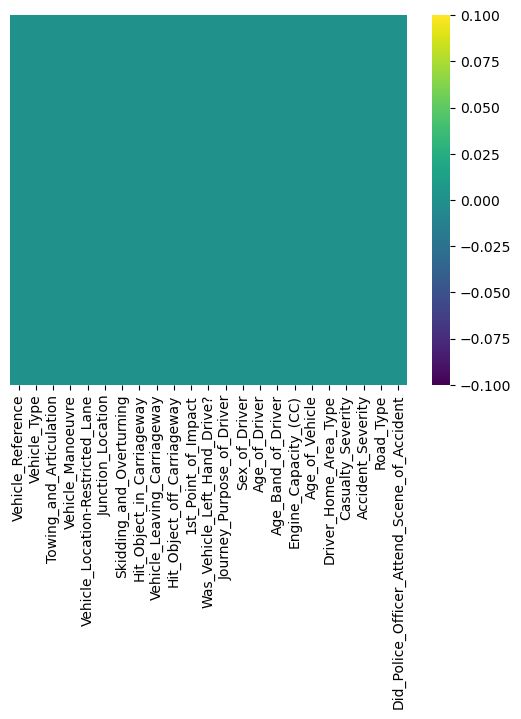

In [17]:
sns.heatmap(data.isnull(), yticklabels = False, cmap = "viridis")

<AxesSubplot:>

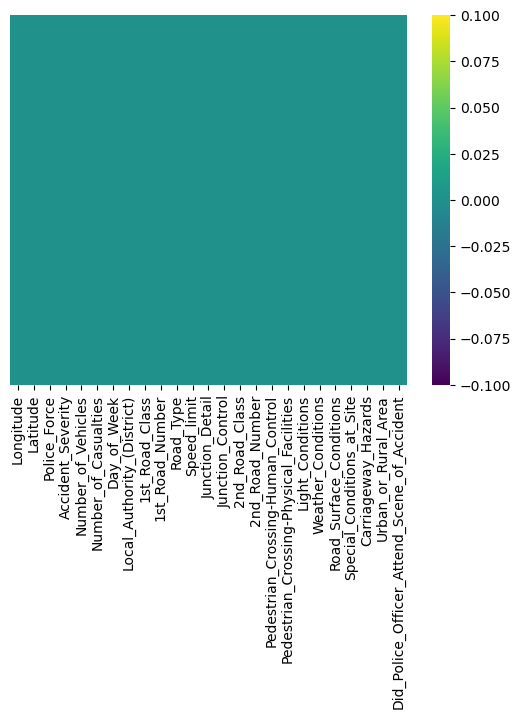

In [19]:
sns.heatmap(data2.isnull(), yticklabels = False, cmap = "viridis")

In [19]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Accident_Index,872737.0,317308.90,179865.40,0.0,162454.0,319330.0,474109.0,624939.0
Vehicle_Reference,872737.0,1.53,0.73,1.0,1.0,1.0,2.0,31.0
Vehicle_Type,872737.0,9.45,4.73,2.0,9.0,9.0,9.0,90.0
Towing_and_Articulation,872737.0,0.02,0.26,0.0,0.0,0.0,0.0,5.0
Vehicle_Manoeuvre,872737.0,12.57,6.14,1.0,7.0,17.0,18.0,18.0
Vehicle_Location-Restricted_Lane,872737.0,0.08,0.76,0.0,0.0,0.0,0.0,9.0
Junction_Location,872737.0,2.56,3.15,0.0,0.0,1.0,6.0,8.0
Skidding_and_Overturning,872737.0,0.24,0.72,0.0,0.0,0.0,0.0,5.0
Hit_Object_in_Carriageway,872737.0,0.33,1.70,0.0,0.0,0.0,0.0,12.0
Vehicle_Leaving_Carriageway,872737.0,0.43,1.48,0.0,0.0,0.0,0.0,8.0


In [20]:
data2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Accident_Index,1126.0,562.50,325.19,0.00,281.25,562.50,843.75,1125.00
Longitude,1126.0,-1.46,1.16,-5.07,-2.25,-1.62,-0.34,1.75
Latitude,1126.0,52.66,1.20,50.15,51.48,53.05,53.54,55.07
Police_Force,1126.0,22.25,18.77,1.00,6.00,13.00,44.00,95.00
Accident_Severity,1126.0,2.85,0.39,1.00,3.00,3.00,3.00,3.00
Number_of_Vehicles,1126.0,1.74,0.64,1.00,1.00,2.00,2.00,7.00
Number_of_Casualties,1126.0,1.31,0.73,1.00,1.00,1.00,1.00,7.00
Date,1126.0,474.31,278.12,0.00,234.25,472.50,714.75,957.00
Day_of_Week,1126.0,4.16,1.89,1.00,3.00,4.00,6.00,7.00
Time,1126.0,244.85,130.87,0.00,128.25,254.00,350.00,490.00


Data Analysis

In [21]:
# make new column counting many accidents
data['sum_of_accidents'] = data['Junction_Location'] + data['Skidding_and_Overturning'] + data['Hit_Object_in_Carriageway'] + data['Vehicle_Leaving_Carriageway']+data['Hit_Object_off_Carriageway']
# check if that person had accidents or not if note so i will drop it 
data = data.drop(data[data['sum_of_accidents'] <= 0].index)
# drop sum_of_accidents becouse useless now
data = data.drop('sum_of_accidents', axis=1)


# sorting index after cleaning
data = data.reset_index(drop=True)

# counter of accident
Num_of_Accident = data.shape[0]

In [22]:
# make new column counting many accidents
data['sum_of_accidents'] = data['Junction_Location'] + data['Skidding_and_Overturning'] + data['Hit_Object_in_Carriageway'] + data['Vehicle_Leaving_Carriageway']+data['Hit_Object_off_Carriageway']
# check if that person had accidents or not if note so i will drop it 
data = data.drop(data[data['sum_of_accidents'] <= 0].index)
# drop sum_of_accidents becouse useless now
data = data.drop('sum_of_accidents', axis=1)


# sorting index after cleaning
data = data.reset_index(drop=True)

# counter of accident
Num_of_Accident = data.shape[0]



Machine learning Module

In [329]:
data.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Driver_IMD_Decile,Driver_Home_Area_Type,Casualty_Severity,Accident_Severity,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident,Num_Junction_Location,Num_Hit_Object_in_Carriageway,Num_Hit_Object_off_Carriageway,Num_Vehicle_Leaving_Carriageway
0,0,1,11.0,0.0,17.0,0.0,0.0,0.0,4.0,0.0,...,1,1.0,3.0,3.0,6.0,1.0,0,1,0,0
1,3,2,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,5,1.0,3.0,3.0,6.0,1.0,1,0,0,0
2,4,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,1.0,...,5,1.0,3.0,3.0,6.0,1.0,0,0,0,1
3,5,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,2,1.0,3.0,3.0,6.0,1.0,1,0,0,0
4,6,1,11.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,1,1.0,3.0,3.0,2.0,1.0,1,0,0,0
5,7,1,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,3,1.0,3.0,3.0,6.0,1.0,1,0,0,0
6,8,1,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7,1.0,3.0,2.0,6.0,1.0,1,0,0,0
7,9,1,9.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,...,2,1.0,3.0,3.0,6.0,1.0,1,0,0,0
8,10,1,9.0,0.0,18.0,0.0,8.0,0.0,7.0,7.0,...,6,1.0,3.0,2.0,6.0,1.0,1,1,1,1
9,10,2,9.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,...,3,1.0,3.0,3.0,6.0,2.0,1,0,0,0


# Casualty_Severity

In [18]:
#Features 
X3 = data[["Road_Type", "Did_Police_Officer_Attend_Scene_of_Accident"]]
#Target
y = data["Casualty_Severity"]


In [19]:
X3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 2 to 211570
Data columns (total 2 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Road_Type                                    100000 non-null  float64
 1   Did_Police_Officer_Attend_Scene_of_Accident  100000 non-null  float64
dtypes: float64(2)
memory usage: 2.3 MB


In [19]:
y.head()

2    3.0
3    3.0
4    3.0
6    3.0
7    3.0
Name: Casualty_Severity, dtype: float64

Data Scaling 

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X[1]

array([-0.09417931, -0.46271197, -0.28854558, -0.1973305 , -0.08815642,
       -1.72221409, -0.33073549,  0.35983447, -0.10515719, -0.81307965,
        0.52781356, -0.48333019])

Data split

In [20]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42 , shuffle = True)


In [22]:
X3_train

,Road_Type,Did_Police_Officer_Attend_Scene_of_Accident
161972,6.0,1.0
112552,6.0,1.0
103427,6.0,1.0
32759,6.0,1.0
195707,6.0,1.0
...,...,...
15420,3.0,1.0
124859,6.0,1.0
165297,3.0,2.0
2033,6.0,1.0


In [23]:
y_train

161972    3.0
112552    3.0
103427    3.0
32759     3.0
195707    3.0
         ... 
15420     3.0
124859    3.0
165297    3.0
2033      3.0
37562     3.0
Name: Casualty_Severity, Length: 80000, dtype: float64

In [24]:
print('X_train shape : ' , X3_train.shape)
print('X_test shape  : ' , X3_test.shape)
print('y_train shape : ' , y_train.shape)
print('y_test shape  : ' , y_test.shape)

X_train shape :  (80000, 2)
X_test shape  :  (20000, 2)
y_train shape :  (80000,)
y_test shape  :  (20000,)


In [25]:
treemodel = DecisionTreeClassifier()

In [26]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

In [27]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(treemodel, parameter, scoring='f1', cv=5)




In [29]:
cv.fit(X3_train,y_train)


d:\Downloads2\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_r

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='f1')

In [30]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [32]:
y_predtree = cv.predict(X3_test)


In [33]:
from sklearn.metrics import f1_score


In [35]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, cv.predict(X3_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, cv.predict(X3_test))))

Train accuracy :0.88
Test accuracy :0.88


SVM 

In [9]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42 , shuffle = True)

In [10]:
data = data.iloc[0:100000]

In [11]:
svm_classifier = SVC()
svm_classifier.fit(X3_train, y_train)

SVC()

In [12]:
y_pred_svm = svm_classifier.predict(X3_test)

In [13]:
accuracy_svm = svm_classifier.score(X3_test, y_test)
acc_svm = round(accuracy_svm * 100, 2)
svm_report = classification_report(y_true=y_test, y_pred=y_pred_svm, digits=6)

print("Accuracy:", acc_svm)
print(svm_report)

d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 87.94
              precision    recall  f1-score   support

         1.0   0.000000  0.000000  0.000000      1823
         2.0   0.000000  0.000000  0.000000     19227
         3.0   0.879403  1.000000  0.935832    153498

    accuracy                       0.879403    174548
   macro avg   0.293134  0.333333  0.311944    174548
weighted avg   0.773349  0.879403  0.822973    174548



d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accident severity

In [350]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 661 to 1765837
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               1126 non-null   int64  
 1   Longitude                                    1126 non-null   float64
 2   Latitude                                     1126 non-null   float64
 3   Police_Force                                 1126 non-null   int64  
 4   Accident_Severity                            1126 non-null   int64  
 5   Number_of_Vehicles                           1126 non-null   int64  
 6   Number_of_Casualties                         1126 non-null   int64  
 7   Date                                         1126 non-null   int32  
 8   Day_of_Week                                  1126 non-null   int64  
 9   Time                                         1126 non-null   int32  


In [5]:
X2 = data2[[ "Police_Force"	, "Number_of_Vehicles" , "Number_of_Casualties" , "Day_of_Week" ,	"Local_Authority_(District)", "1st_Road_Class", "1st_Road_Number", "Road_Type" , "Speed_limit"]]

y2 = data2["Accident_Severity"]


In [6]:
X2.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit
0,1,1,1,3,12,3,3218,6,30
1,1,1,1,4,12,4,450,3,30
2,1,2,1,5,12,5,0,6,30
3,1,1,1,6,12,3,3220,6,30
4,1,1,1,2,12,6,0,6,30


In [7]:
y2.head()

0    2
1    3
2    3
3    3
4    3
Name: Accident_Severity, dtype: int64

In [8]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [9]:
X2[1]

array([-1.0589869 , -1.20169973, -0.44424235, -0.0649409 , -1.23917268,
       -0.06113449, -0.30224319, -1.36392159, -0.51589803])

In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42 , shuffle = True)

In [12]:
X2_train

array([[ 0.67892427, -1.20169973, -0.44424235, ...,  0.04806345,
         0.50337276, -0.51589803],
       [-0.36382243, -1.20169973, -0.44424235, ..., -0.25945765,
         0.50337276,  1.87658007],
       [-0.47968318,  0.22697328,  0.79957652, ..., -0.23432114,
         0.50337276, -0.51589803],
       ...,
       [ 0.79478501,  1.65564629, -0.44424235, ..., -0.47124609,
         0.50337276, -0.51589803],
       [ 4.38646808, -1.20169973, -0.44424235, ...,  0.1047543 ,
         0.50337276, -0.51589803],
       [-1.0589869 ,  0.22697328, -0.44424235, ..., -0.54291188,
         0.50337276, -0.51589803]])

In [13]:
y2_train

75220    3
48955    3
44966    3
13568    2
92727    3
        ..
6265     3
54886    3
76820    3
860      3
15795    3
Name: Accident_Severity, Length: 80000, dtype: int64

Decision Tree 

In [14]:
treemodel = DecisionTreeClassifier()

In [15]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'max_depth':[1,2,3,4,5]
}

In [16]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(treemodel,parameter,scoring='f1',cv=5)


In [17]:
cv.fit(X2_train, y2_train) 

d:\Downloads2\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _, f, _ = precision_r

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='f1')

In [18]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [19]:
y_predtree = cv.predict(X2_test)


In [20]:
from sklearn.metrics import accuracy_score


In [21]:
print("Train accuracy :{:.2f}".format(accuracy_score(y2_train, cv.predict(X2_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y2_test, cv.predict(X2_test))))

Train accuracy :0.86
Test accuracy :0.86


SVM 

In [22]:
data2 = data2.iloc[0:100000]

In [23]:
svm_classifier = SVC()
svm_classifier.fit(X2_train, y2_train)

SVC()

In [24]:
y_pred_svm = svm_classifier.predict(X2_test)

In [26]:
accuracy_svm = svm_classifier.score(X2_test, y2_test)
acc_svm = round(accuracy_svm * 100, 2)
svm_report = classification_report(y_true=y2_test, y_pred=y_pred_svm, digits=6)

print("Accuracy:", acc_svm)
print(svm_report)

Accuracy: 86.2
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       242
           2   0.400000  0.000795  0.001586      2517
           3   0.862166  0.999884  0.925932     17241

    accuracy                       0.862050     20000
   macro avg   0.420722  0.333560  0.309173     20000
weighted avg   0.793570  0.862050  0.798399     20000



d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Downloads2\New folder (2)\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
confusion_matrix_svm = pd.crosstab(y2_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion_matrix_svm)

Predicted  2      3    All
Actual                    
1          1    241    242
2          2   2515   2517
3          2  17239  17241
All        5  19995  20000
